In [27]:
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import signal

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import random_split
from torch.optim.lr_scheduler import StepLR
import scipy
from scipy import signal
from torchvision.transforms import transforms

In [2]:
def stackfy(fram):
    stack = np.zeros(7,7,32)
    for i in range(32):
        stack[:,:,i] = spect(fram.iloc[i,:].to_numpy())
    return stack

def spect(signa):
    freq = 128
    plt.axis('off')
    # plt.patch.set_visible(False)
    freqs, times, Sx = signal.spectrogram(signa, freq)
    amplitude = np.abs(Sx)
    sp = plt.pcolormesh(times, freqs, np.log(amplitude), shading='gouraud')
    return sp


In [3]:
data = pd.read_csv('C:\\Users\\a1882\\Desktop\\EEG\\new_implement\\data\\orgin_raw_data_slid_window_slice_3000\\rest_zyy_04_epocflex_2023_window_67.csv')
data.shape

(32, 3000)

In [33]:
data = stackfy(data)
data = torch.from_numpy(data)

TypeError: Cannot interpret '7' as a data type

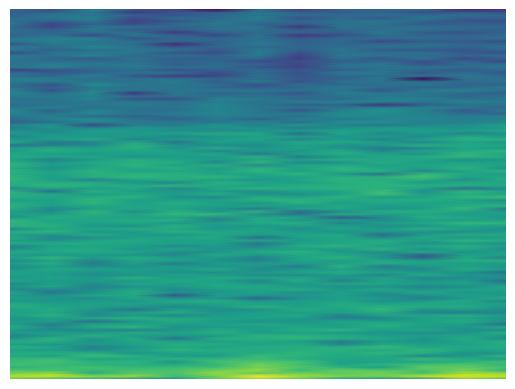

In [46]:
import numpy as np
spectro = spect(data.iloc[1,:].to_numpy())
plt.axis('off')
plt.savefig('image.png', bbox_inches='tight')

# 加载图像，并将其转换为张量
image = plt.imread('image.png')
tensor_data = transforms.ToTensor()(image)

In [47]:
tensor_data.shape

torch.Size([4, 389, 515])

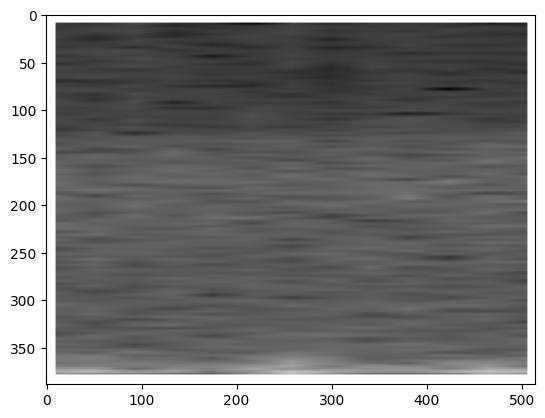

In [40]:
# image.shape
# gray_image = np.dot(image[..., :3], [0.2989, 0.5870, 0.1140])
# plt.imshow(gray_image, cmap='gray')

In [44]:
# import numpy as np
#
# # 假设 image 是一个大小为 (h, w, 4) 的图像，最后一个通道是 alpha 通道
# # 将前三个通道的数值转换为 RGB 值，然后将 RGB 值转换为 hex 值
# hex_image = np.apply_along_axis(
#     lambda x: "#{:02x}{:02x}{:02x}".format(*x[:-1]),
#     axis=2,
#     arr=image.astype(np.uint8)
# )
#
# # 显示 hex 值图像
# print(hex_image)


[['#010101' '#010101' '#010101' ... '#010101' '#010101' '#010101']
 ['#010101' '#010101' '#010101' ... '#010101' '#010101' '#010101']
 ['#010101' '#010101' '#010101' ... '#010101' '#010101' '#010101']
 ...
 ['#010101' '#010101' '#010101' ... '#010101' '#010101' '#010101']
 ['#010101' '#010101' '#010101' ... '#010101' '#010101' '#010101']
 ['#010101' '#010101' '#010101' ... '#010101' '#010101' '#010101']]


In [45]:
# from PIL import Image
#
# # 假设 hex_image 是一个大小为 (h, w) 的二维数组，表示 hex 值图像
# # 将 hex 值图像转换为 RGB 值图像
# rgb_image = np.array([list(int(hex_value[1:], 16).to_bytes(3, 'big')) for hex_value in hex_image.flat],
#                      dtype=np.uint8).reshape(hex_image.shape[0], hex_image.shape[1], 3)
#
# # 使用 PIL 库将 RGB 值图像保存为 PNG 格式
# pil_image = Image.fromarray(rgb_image)
# pil_image.save("output.png")


In [38]:
from PIL import Image

# 假设 image 是一个 RGB 图像，其大小为 (389, 515, 4)
# 将 image 转换为 PIL 中的 Image 对象
pil_image = Image.fromarray(image)

# 将 PIL Image 对象转换为灰度图像
gray_image = pil_image.convert('L')

# 将灰度图像转换为张量
tensor_data = transforms.ToTensor()(gray_image)

TypeError: Cannot handle this data type: (1, 1, 4), <f4